                                ASSIGNMENT

#Question 1 — What is Anomaly Detection? Types with examples
# ANSWER:

Anomaly detection is the process of identifying observations that deviate significantly from the majority of data. Anomalies (outliers) often indicate rare events, errors, or novel phenomena.

#Types:

#1)Point anomaly:

Definition: A single instance that is abnormal compared to the rest.

Example: A single taxi fare of $10,000 in a dataset where most fares are $3–$100 — likely a bad record or fraud.

#2)Contextual (or conditional) anomaly:

Definition: An observation that is anomalous in a specific context (time, location, season) but not globally.

Example: 50°F at midnight in summer might be normal in some regions but 50°F at noon in July could be unusual. In time series, a sudden high load at 3am could be anomalous though same value at 3pm is normal.

#3)Collective anomaly:

Definition: A collection of related observations is anomalous together, even if individual points are not.

Example: A sustained 2-hour period of slightly elevated sensor readings that together indicate equipment starting to fail. Each reading alone is near-normal, but the sequence is abnormal.

#Question 2 — Compare Isolation Forest, DBSCAN, and Local Outlier Factor (LOF)

#ANSWER:

#Isolation Forest:

Approach: Tree-based ensemble that isolates instances by random splits; anomalies require fewer splits (shorter path lengths).

Strengths: Fast, scales well to large datasets, works on high-dimensional numeric data. Doesn’t assume clusters or densities.

Weaknesses: Requires tuning of contamination, can miss contextual anomalies without engineered features.

Suitable use-cases: Large tabular datasets, fraud detection, telemetry where anomalies are globally rare.

#DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Approach: Density-based clustering — dense regions form clusters; points in low-density regions are labeled noise (outliers). Key parameters: eps (radius) and min_samples.

Strengths: Finds arbitrarily-shaped clusters, identifies cluster-based outliers. No need to pre-specify number of clusters.

Weaknesses: Sensitive to eps and varying density; struggles in high-dimensional spaces. Not inherently designed for streaming.

Suitable use-cases: Spatial data, geolocation clustering, datasets with clear density-separated clusters.

#Local Outlier Factor (LOF):

Approach: Density-based local anomaly score — compares local density of a point to its neighbors; lower density relative to neighbors → higher LOF score.

Strengths: Detects local anomalies (points that are outliers w.r.t. local neighborhood). Good when anomalies are local.

Weaknesses: Sensitive to k (neighbors), not suitable for very large datasets without sampling, not directly streaming-friendly.

Suitable use-cases: Datasets where local context matters (e.g., sensor clusters), medium-sized datasets.

Brief guidance: For large-scale, real-time tabular data use Isolation Forest (or streaming variants). For spatial/clustering scenarios use DBSCAN. For local-density anomalies, use LOF.

#Question 3 — Key components of a Time Series (with a short example each)

#ANSWER:

A typical time series is decomposed into:

#Trend —
long-term increase or decrease in the series.
Example: Yearly growth in monthly electricity consumption.

#Seasonality —
repeating short-term cycle with fixed frequency.
Example: Daily increase in traffic during morning rush-hour each weekday, or monthly pattern where summer months always show higher airline passengers.

#Cyclic component —
long-term oscillations not of fixed period (often economic cycles).
Example: A multi-year business cycle in manufacturing output (not strictly periodic).

#Residuals (noise / irregular component) —
the leftover random variation after removing trend & seasonality.
Example: Day-to-day random variation in sales due to promotions or weather.

#Question 4 — Stationarity: definition, tests, and transformations

#ANSWER:

#Stationary:
A time series is (weakly) stationary when its statistical properties (mean, variance, autocovariance) are constant over time. Many classical time series models assume stationarity.

#Tests

#Augmented Dickey-Fuller (ADF):
Null hypothesis = unit root present (non-stationary). A low p-value rejects non-stationarity.

#KPSS (Kwiatkowski–Phillips–Schmidt–Shin):
Null hypothesis = series is stationary. A high p-value supports stationarity. Use both to get robust judgment.

#Transformations to make series stationary

Differencing: y_t - y_{t-1} (first difference) removes linear trend; seasonal difference y_t - y_{t-s} removes seasonal patterns.

Log transform: stabilizes variance (for multiplicative seasonality).

Detrending: remove fitted trend (linear regression or moving average trend).

Box–Cox transform: family of power transforms to stabilize variance.
Combine methods, e.g., log → seasonal diff → first diff, then re-test with ADF/KPSS.

#Question 5 — AR, MA, ARIMA, SARIMA, SARIMAX — structure and application

#ANSWER:

#AR(p) — Autoregressive model :

#Structure:

Xt​=c+∑i=1p​ϕi​Xt−i​+ε
	​


#When to use:
Series where past values predict current value; no moving-average term or differencing needed if stationary.

#MA(q) — Moving Average model:

#Structure:

Xt​=μ+εt​+∑i=1q​θi​εt−i

	​

 where ε are white noise errors.

#When to use:

Series where current value depends on past forecast errors.

#ARIMA(p,d,q):

#Structure:
AR and MA components with differencing of order d to make series stationary. Notation: ARIMA(p,d,q).

#When to use:
Non-stationary series (trend) that can be made stationary by differencing; no seasonal structure (or seasonality pre-removed).

#SARIMA (seasonal ARIMA) — ARIMA with seasonal terms:

#Structure:
Adds seasonal AR and MA terms and seasonal differencing: SARIMA(p,d,q)(P,D,Q,s) where s is seasonal period.

#When to use:
Time series with clear seasonality (monthly, weekly) plus possible non-seasonal behaviors.

#SARIMAX — SARIMA with eXogenous regressors:

#Structure:
SARIMA plus external variables (X) that help explain the series (weather, promotions, holidays).

#When to use:
If exogenous predictors are available and improve forecasts (e.g., temperature affects energy consumption).

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


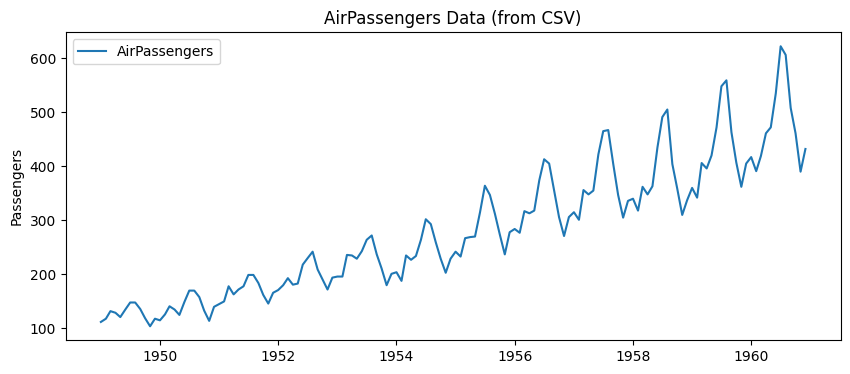

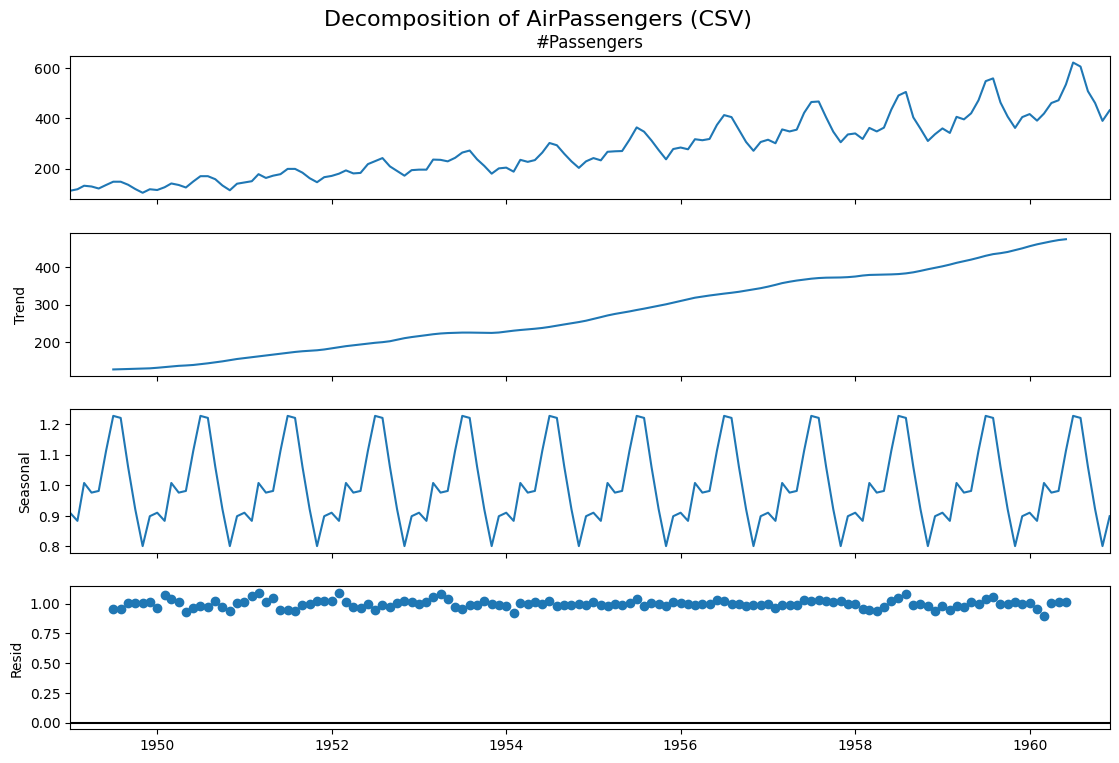

In [2]:
# Q6: Load AirPassengers.csv, plot and decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset
df = pd.read_csv("AirPassengers.csv")

print(df.head())   # check structure

# Assume the dataset has columns like ['Month','Passengers']
# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Time series
ts = df['#Passengers']

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(ts, label='AirPassengers')
plt.title('AirPassengers Data (from CSV)')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Seasonal decomposition
decomp = seasonal_decompose(ts, model='multiplicative', period=12)

fig = decomp.plot()
fig.set_size_inches(12,8)
plt.suptitle('Decomposition of AirPassengers (CSV)', fontsize=16)
plt.show()


In [ ]:
# Q7: IsolationForest example on NYC Taxi fares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Try to load a CSV; if not present, create a synthetic sample
try:
    df = pd.read_csv('nyc_taxi_fare.csv')  # expected to have columns like 'fare_amount','trip_distance'
    print("Loaded nyc_taxi_fare.csv")
except Exception:
    # synthetic sample: normal fares plus some outliers
    rng = np.random.RandomState(42)
    n = 2000
    trip_distance = rng.gamma(2.0, 2.0, n)
    fare_amount = 2.5 + 2.0*trip_distance + rng.normal(0, 3.0, n)
    # inject some extreme outliers
    fare_amount[[10, 200, 500]] = [500, 300, 800]
    df = pd.DataFrame({'trip_distance': trip_distance, 'fare_amount': fare_amount})

# Use only numeric features for anomaly detection
features = df[['trip_distance','fare_amount']].copy()

# Fit Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(features)
scores = iso.decision_function(features)
anomaly_flag = iso.predict(features)  # -1 anomaly, 1 normal
features['anomaly'] = (anomaly_flag == -1)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(features['trip_distance'], features['fare_amount'], s=10, label='normal')
plt.scatter(features.loc[features['anomaly'], 'trip_distance'],
            features.loc[features['anomaly'], 'fare_amount'],
            color='red', s=30, label='anomaly')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('Isolation Forest Anomalies (NYC Taxi Fare)')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


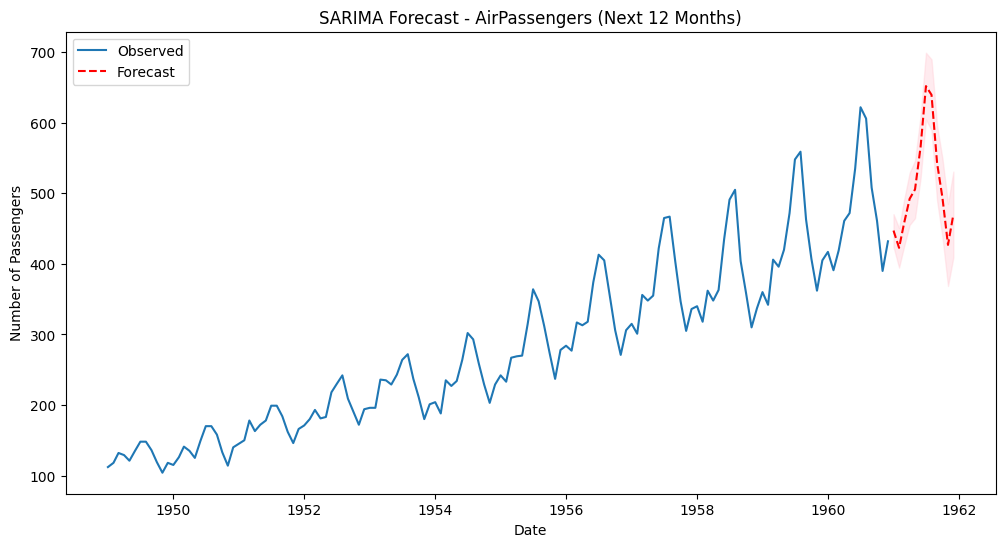

In [3]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset
# and forecast the next 12 months.

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("AirPassengers.csv")   # make sure the file path is correct
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Extract time series
ts = df['#Passengers']

# Build SARIMA model (common choice: (1,1,1)(1,1,1,12))
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit model
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(12,6))
plt.plot(ts, label="Observed")
plt.plot(forecast_mean.index, forecast_mean, color='red', linestyle="--", label="Forecast")
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color="pink", alpha=0.3)
plt.title("SARIMA Forecast - AirPassengers (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


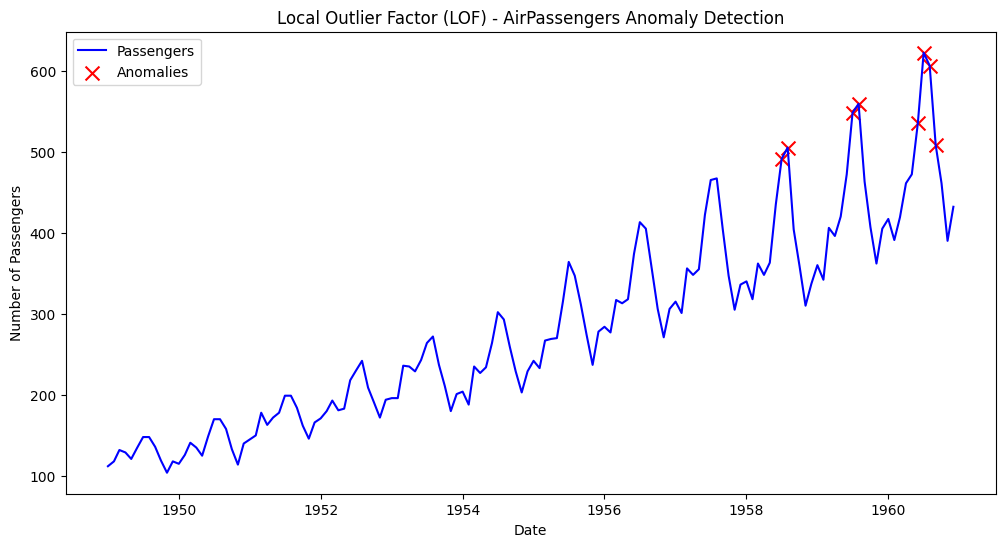

In [4]:
# Question 9: Apply Local Outlier Factor (LOF) on AirPassengers dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load dataset
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Extract numerical feature (#Passengers)
X = df[['#Passengers']].values

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # 5% anomalies
y_pred = lof.fit_predict(X)

# Add anomaly labels to dataframe
df['LOF_Label'] = y_pred  # -1 = anomaly, 1 = normal

# Plot anomalies vs normal
plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], label="Passengers", color="blue")
plt.scatter(df.index[df['LOF_Label'] == -1],
            df['#Passengers'][df['LOF_Label'] == -1],
            color="red", marker="x", s=100, label="Anomalies")
plt.title("Local Outlier Factor (LOF) - AirPassengers Anomaly Detection")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


#Question 10 — Real-time pipeline for power-grid energy demand forecasting & anomaly detection

#ANSWER:

Below is a practical streaming/data-science architecture and choices tailored to 15-minute sensor data with exogenous features (region, weather).

#1) Ingestion & storage

Use a streaming ingestion layer (Kafka / Kinesis / PubSub) to collect 15-min records.

Keep a short-term in-memory store (Redis or RocksDB) for recent windows and a long-term store (data lake / time-series DB like InfluxDB, TimescaleDB) for historical model training and audits.

#2) Preprocessing & feature engineering (streaming)

Parse timestamps, align to 15-minute bins, handle missing intervals (impute with interpolation or forward-fill with caution).

Create features: lag values (t-1, t-4, t-96 for daily/weekly lags), rolling stats (rolling mean/std over last N windows), calendar features (hour, day-of-week, holiday flag), weather features (temp, humidity) as exogenous inputs.

#3) Real-time anomaly detection (which method?)

#Recommended:
Isolation Forest (or an ensemble) for real-time/high-dimensional tabular streaming because:

Fast inference, handles high-dimensional engineered features (lags + weather), and can be batched per window.

Can run periodically on sliding-window features and produce anomaly scores.

#LOF:
good for local density detection but not ideal for strict streaming without adaptation (memory & neighbor recomputation). Could be used in offline analysis or recalculated on sliding windows if compute allows.

##DBSCAN:
not recommended for per-record streaming detection (parameter sensitivity and clustering semantics). Use for offline cluster-based investigations.

#Practical approach:

Use a two-stage detector: lightweight rule-based checks (e.g., sudden drop > X% thresholds), plus Isolation Forest scoring.

For sequences/collective anomalies, use window-based statistics or an LSTM/autoencoder reconstruction error to catch sequences of small deviations.

#4) Short-term forecasting model (which to use?)

#SARIMAX is a good choice here:
it handles seasonality and accepts exogenous regressors (weather, region indicators). For 15-min frequency, there may be multiple seasonalities (daily, weekly) — SARIMAX can handle seasonal period(s) but may become heavy if multiple seasonalities exist.

#Alternatives:
Prophet (handles multiple seasonality) or machine learning / deep-learning models (Gradient Boosting, LSTM, Temporal Fusion Transformer) if non-linear relationships and many exogenous variables exist.

#Recommendation given options:
Use SARIMAX for interpretable short-term forecasting with exogenous weather variables. If performance is insufficient, upgrade to GBMs or seq2seq models.

#5) Validation & monitoring:

#Backtesting:
walk-forward validation (rolling-origin) with realistic retraining frequency (e.g., daily or weekly depending on drift). Compute RMSE, MAE, MAPE for forecasts.

#Anomaly detection metrics:
precision, recall, F1 when labeled anomalies available. Otherwise monitor alert rates and false-alert feedback from operators.

#Drift detection:
monitor feature distributions and prediction residuals (e.g., population stability index, CUSUM on residual mean). Retrain if drift crosses thresholds.

Operational monitoring: build dashboards for:

Forecast accuracy over sliding windows.

Anomaly counts per region and severity.

Latency and system health metrics for streaming pipeline.

Feedback loop: allow human operators to label anomalies (true/false) to improve detectors.

#6) Deployment & latency:

Serve forecasting model in a low-latency environment (a model server or lightweight container). Forecasting can be done per region or aggregated hierarchically to meet latency/compute needs.

For anomaly detection, run the isolation-forest scoring in-stream on precomputed features; if compute limited, use a smaller ensemble or thresholded rules.

#7) How this helps business / operations:

Real-time alerts for abnormal spikes/drops → enables fast operational response (isolate faults, dispatch crews, shed/non-urgent loads).

Improved resource planning: accurate short-term forecasts enable better dispatch decisions, generator scheduling, and reduced reserve costs.

Preventive maintenance: collective anomalies may indicate equipment degradation; early detection avoids outages.

Cost optimization: avoid over-procurement of energy or penalties for imbalance by better forecasting.

Customer service & SLAs: reduce incidents leading to customer complaints; provide actionable alerts to downstream systems.